In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from random import random
import pandas as pd
import math
from sympy import * 
from scipy.linalg import null_space
import matplotlib
import random

In [3]:
# function to run the Randomized Kaczmarz algorithm
def RK(A, b, x_d):
    " this function takes as inputs a matrix A, vector b, and point x_d and returns the approximation error, norm(x-x_d), across iterations"

    # generating probabilities of choosing the rows
    probas = []
    frob_norm_A = np.linalg.norm(A, ord='fro')
    for i in range(A.shape[0]):
        probas.append((np.linalg.norm(A[i,:], ord=2)**2)/(frob_norm_A**2))

    
    approx_error = [[] for i in range(int(n_run))]
           
    for r in range(int(n_run)):

        x = x_0
        
        approx_error[r].append(np.linalg.norm(x - x_d))

        for i in range(int(n_iter)):
            row_idx = int(np.random.choice(A.shape[0], 1, p=probas)) # to select rows with specified probability
            if np.linalg.norm(A[row_idx,:])==0:  # avoid zero rows
                continue
            else:
                x = x + (b[row_idx] - np.dot(A[row_idx,:],x))/((np.linalg.norm(A[row_idx,:], ord=2))**2)*A[row_idx,:]
                approx_error[r].append(np.linalg.norm(x - x_d))
                
        print("end run", r)

    return(approx_error)

In [13]:
# Generate noisy data
m = 1000
n = 500
r = 300
noisy_A = np.random.randn(m,r) @ np.random.randn(r,n)
basis_nullSpaceNoisyAT = null_space(noisy_A.T)
w = basis_nullSpaceNoisyAT@np.random.randn(basis_nullSpaceNoisyAT.shape[1],)
w = w/np.linalg.norm(w, ord=2)   # w is in the orthogonal complement of the column space of noisy_A
y = noisy_A@np.random.randn(n,)  # w is in the column space of noisy_A

In [33]:
beta = 10
noisy_b = y + beta*w

In [ ]:
# ####### Real data
# # for real data, use the following
# data = pd.read_csv('a1a.csv', sep=',', header=None)
# print(data.head())
# m = data.shape[0]
# n = data.shape[1]-1

# noisy_A = np.array(data.iloc[: , 0:n])
# noisy_b = np.array(data.iloc[: , -1])

# rank_noisyA = np.linalg.matrix_rank(noisy_A)
# augg = np.column_stack((noisy_A,noisy_b))
# rank_aug = np.linalg.matrix_rank(augg)
# print("noisyA is full rank", rank_noisyA==n)
# print("rank(noisyA)  ",rank_noisyA)
# print("rank(noisyA|noisyb)  ",rank_aug)
# print("system tldA x = tldb is consistent:  ", rank_noisyA == rank_aug)

In [15]:
# starting point
x_0 = 40*np.random.randn(n,) 


In [34]:
# reference point
# x_star = np.random.randn(n,)
x_star = np.linalg.pinv(noisy_A)@noisy_b  # x_star equals the least squares solution of the noisy system

In [35]:
# projection of x_0 on the null space of noisy_A
null_spaceNoisyA = null_space(noisy_A)
orthogonal_basis = null_spaceNoisyA
dot_product_values = (x_0.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x0_n =  np.sum( mult_basis , axis=1)
x0_r = x_0 - x0_n



# projection of x_star on the row space of noisy_A
dot_product_values = (x_star.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x_star_n =  np.sum( mult_basis , axis=1)
x_star_r = x_star - x_star_n


In [36]:
# Running the RK algorithm

n_iter = 300000   # number of iterations
n_run = 20        # number of runs of the algorithm

approx_error = RK(noisy_A, noisy_b, x0_n+x_star_r)

end run 0
end run 1
end run 2
end run 3
end run 4
end run 5
end run 6
end run 7
end run 8
end run 9
end run 10
end run 11
end run 12
end run 13
end run 14
end run 15
end run 16
end run 17
end run 18
end run 19


In [37]:
# computing the bounds

# computing the smallest non zero singular value of noisy_A
U, s, Vt = np.linalg.svd(noisy_A)
s = [x for x in s if x>1e-8]
sigma_min = min(s)

bound1 = [] # square root of bound (4) of Theorem 2.2
bound2 = [] # bound (10) of Corollary 3.5
Rtld = (np.linalg.norm(noisy_A, ord='fro')/sigma_min)**2
h = np.linalg.norm(noisy_A @ x_star - noisy_b, ord=2)/sigma_min  # horizon
for k in range(n_iter):
    bound1.append(sqrt((1-1/Rtld)**(k)*(np.linalg.norm(x0_r - x_star_r, ord=2)**2) + h**2))
    bound2.append((1-1/Rtld)**(k)*np.linalg.norm(x0_r - x_star_r, ord=2) + h)


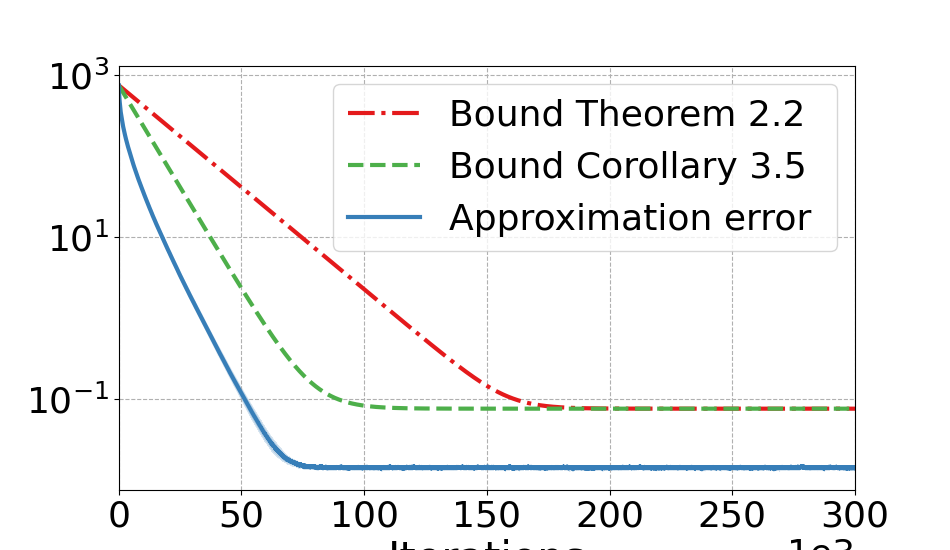

In [38]:
####### plotting
plt.figure(figsize=(9.5, 5.5))

mean =  np.mean(np.array(approx_error), axis = 0)
std = np.std(np.array(approx_error), axis = 0)

plt.plot(bound1, label='Bound Theorem 2.2', color='#e41a1c', linestyle='dashdot', linewidth=3)
plt.plot(bound2, label='Bound Corollary 3.5', color='#4daf4a', linestyle='dashed', linewidth=3)
plt.plot(mean, label="Approximation error ", color='#377eb8', linewidth=3)
plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.2, color='#377eb8')


plt.xlabel("Iterations",fontsize = 30)
plt.rcParams['xtick.labelsize']=26
plt.rcParams['ytick.labelsize']=26
plt.legend(fontsize=26, loc='upper right')
plt.xlim(0,n_iter)
plt.yscale('log')
plt.grid(linestyle = '--')
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))

plt.savefig('comparing_bounds5_noisy_small_xls', bbox_inches='tight')


## Case noisy homogeneous system A_tld x = 0

In [65]:
# Generate noisy matrix via SVD
m = 1000
n = 300
r = 300   # rank

# Generate orthonormal matrices U and V 
U = linalg.orth(np.random.randn(m,m))
V = linalg.orth(np.random.randn(n,n))

# Generate singular values
sigma_min = 10
sigma_max = 100
singular_values = np.linspace(sigma_min,sigma_max,r)[::-1]

# Generate diagonal matrix Sigma
Sigma = np.zeros((m, n))  # m x n matrix with singular values on the diagonal
np.fill_diagonal(Sigma, np.concatenate((singular_values,np.zeros((n-r,)))))

# Construct the noisy data
noisy_A = U@Sigma@(V.T)
noisy_b = np.zeros((m,))

In [66]:
x_star = V[:,r-1]  # x_star = the smallest right singular vector

In [56]:
# starting point
x_0 = np.random.randn(n,)

In [67]:
# projection of x_0 on the null space of noisy_A
null_spaceNoisyA = null_space(noisy_A)
orthogonal_basis = null_spaceNoisyA
dot_product_values = (x_0.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x0_n =  np.sum( mult_basis , axis=1)
x0_r = x_0 - x0_n


# projection of x_star on the row space of noisy_A
dot_product_values = (x_star.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x_star_n =  np.sum( mult_basis , axis=1)
x_star_r = x_star - x_star_n

In [68]:
# Running the RK algorithm

n_iter = 140000   # number of iterations
n_run = 20        # number of runs of the algorithm

approx_error = RK(noisy_A, noisy_b, x0_n+x_star_r)

end run 0
end run 1
end run 2
end run 3
end run 4
end run 5
end run 6
end run 7
end run 8
end run 9
end run 10
end run 11
end run 12
end run 13
end run 14
end run 15
end run 16
end run 17
end run 18
end run 19


In [69]:
# computing the bounds

# computing the smallest non zero singular value of noisy_A
U, s, Vt = np.linalg.svd(noisy_A)
s = [x for x in s if x>1e-8]
sigma_min = min(s)

bound1 = [] # square root of bound (4) of Theorem 2.2
bound2 = [] # bound (10) of Corollary 3.5
Rtld = (np.linalg.norm(noisy_A, ord='fro')/sigma_min)**2
h = np.linalg.norm(noisy_A @ x_star - noisy_b, ord=2)/sigma_min  # horizon
for k in range(n_iter):
    bound1.append(sqrt((1-1/Rtld)**(k)*(np.linalg.norm(x0_r - x_star_r, ord=2)**2) + h**2))
    bound2.append((1-1/Rtld)**(k)*np.linalg.norm(x0_r - x_star_r, ord=2) + h)


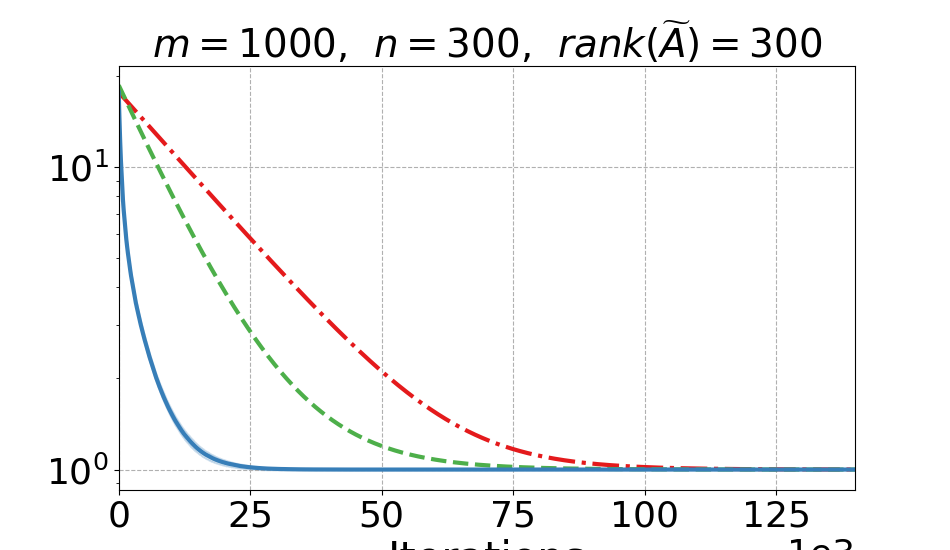

In [ ]:
####### plotting
plt.figure(figsize=(9.5, 5.5))

mean =  np.mean(np.array(approx_error), axis = 0)
std = np.std(np.array(approx_error), axis = 0)

plt.plot(bound1, label='Bound Theorem 2.2', color='#e41a1c', linestyle='dashdot', linewidth=3)
plt.plot(bound2, label='Bound Corollary 3.5', color='#4daf4a', linestyle='dashed', linewidth=3)
plt.plot(mean, label="Approximation error ", color='#377eb8', linewidth=3)
plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.2, color='#377eb8')


plt.xlabel("Iterations",fontsize = 30)
plt.rcParams['xtick.labelsize']=26
plt.rcParams['ytick.labelsize']=26
plt.legend(fontsize=26, loc='upper right')
plt.title(r'$m=%d$'%(m)+',  '+r'$n=%d$'%(n)+',  '+r'$rank(\widetilde A)=%d$'%(r), fontsize = 28)
plt.xlim(0,n_iter)
plt.yscale('log')
plt.grid(linestyle = '--')
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))

## Empirical Validation of Theorem 3.2

In [72]:
# function to run the RK algorithm and computing scalar product of quantity (a) across iterations
def RK_scalar_product(A, b, x_d):
    " this function takes as inputs a matrix A, vector b, and point x_d and returns the scalar product, <x-x_d,v_j>, across iterations"

    # generating probabilities of choosing the rows
    probas = []
    frob_norm_A = np.linalg.norm(A, ord='fro')
    for i in range(A.shape[0]):
        probas.append((np.linalg.norm(A[i,:], ord=2)**2)/(frob_norm_A**2))

    
    scalar_product = [[[] for i in range(int(n_run))] for k in range(len(indices))]
           
    for run in range(int(n_run)):

        x = x_0
        
        p = 0
        for k in indices:
            scalar_product[p][run].append(np.dot(x - x_d, V[:,k]))
            p += 1

        for i in range(int(n_iter)):
            row_idx = int(np.random.choice(A.shape[0], 1, p=probas))  # to select rows with specified probability
            if np.linalg.norm(A[row_idx,:])==0: # avoid zero rows
                continue
            else:
                x = x + (b[row_idx] - np.dot(A[row_idx,:],x))/((np.linalg.norm(A[row_idx,:], ord=2))**2)*A[row_idx,:]
                d = 0
                for k in indices:
                    scalar_product[d][run].append(np.dot(x - x_d, V[:,k]))
                    d += 1    
                
        print("end run", run)

    return(scalar_product)

In [83]:
# Generate noisy matrix via SVD
m = 1000
n = 200
r = 100   # rank

# Generate orthonormal matrices U and V 
U = linalg.orth(np.random.randn(m,m))
V = linalg.orth(np.random.randn(n,n))

# Generate singular values
sigma_min = 10
sigma_max = 100
singular_values = np.linspace(sigma_min,sigma_max,r)[::-1]

# Generate diagonal matrix Sigma
Sigma = np.zeros((m, n))  # m x n matrix with singular values on the diagonal
np.fill_diagonal(Sigma, np.concatenate((singular_values,np.zeros((n-r,)))))

# Construct the noisy data
noisy_A = U@Sigma@(V.T)
noisy_b = np.random.randn(m,)

In [84]:
# select some indices of right singular vectors
indices = random.sample(range(0, r), 9)
indices.append(r-1)
indices

[71, 89, 10, 63, 6, 36, 18, 95, 26, 99]

In [91]:
x_star = 10*np.random.randn(n,)  
# x_star = np.linalg.pinv(noisy_A)@noisy_b

In [92]:
# starting point
x_0 = 20*np.random.randn(n,)

In [93]:
# projection of x_0 on the null space of noisy_A
null_spaceNoisyA = null_space(noisy_A)
orthogonal_basis = null_spaceNoisyA
dot_product_values = (x_0.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x0_n =  np.sum( mult_basis , axis=1)
x0_r = x_0 - x0_n


# projection of x_star on the row space of noisy_A
dot_product_values = (x_star.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x_star_n =  np.sum( mult_basis , axis=1)
x_star_r = x_star - x_star_n

In [94]:
# Running the RK algorithm

n_iter = 20000   # number of iterations
n_run = 20        # number of runs of the algorithm

scalar_product = RK_scalar_product(noisy_A, noisy_b, x0_n+x_star_r)

end run 0
end run 1
end run 2
end run 3
end run 4
end run 5
end run 6
end run 7
end run 8
end run 9
end run 10
end run 11
end run 12
end run 13
end run 14
end run 15
end run 16
end run 17
end run 18
end run 19


In [95]:
# computing quantity (b) and (c)
b = [[] for n in range(len(indices))]
c = [[] for n in range(len(indices))]
q = 0
for j in indices:
    alpha = (1-(singular_values[j]/np.linalg.norm(noisy_A, ord='fro'))**2)
    for k in range(n_iter):
        b[q].append((alpha**k)*(np.dot(x0_r-x_star_r,V[:,j])))
        c[q].append((1-alpha**k)*np.dot(noisy_A@x_star-noisy_b,U[:,j])/singular_values[j])
    q += 1

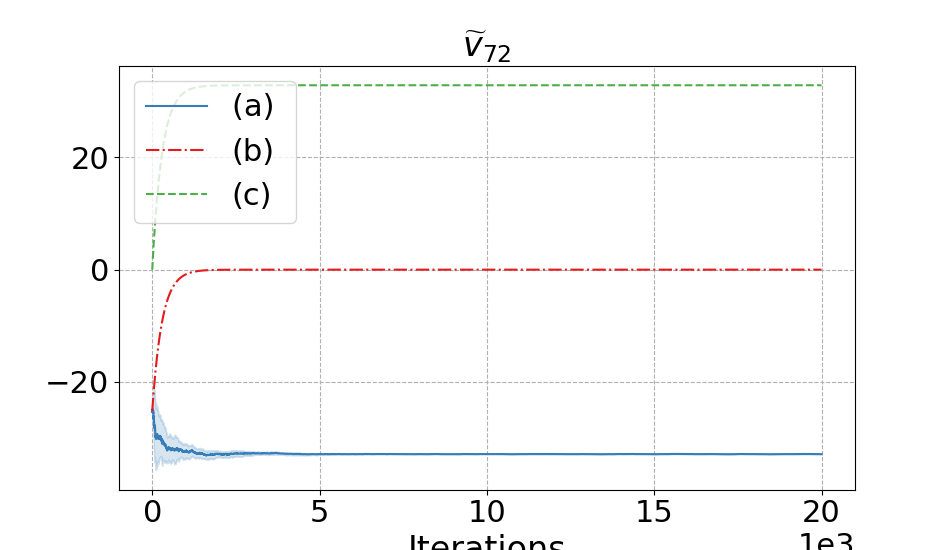

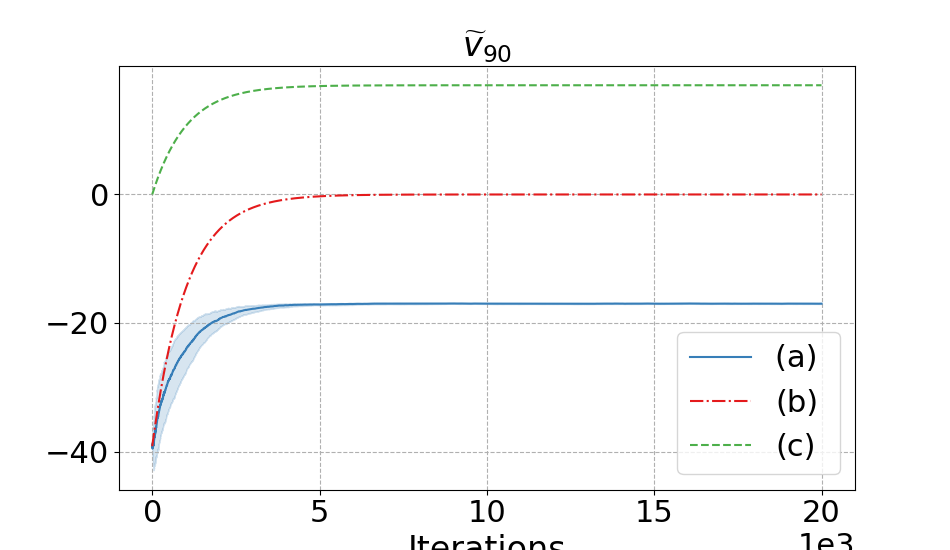

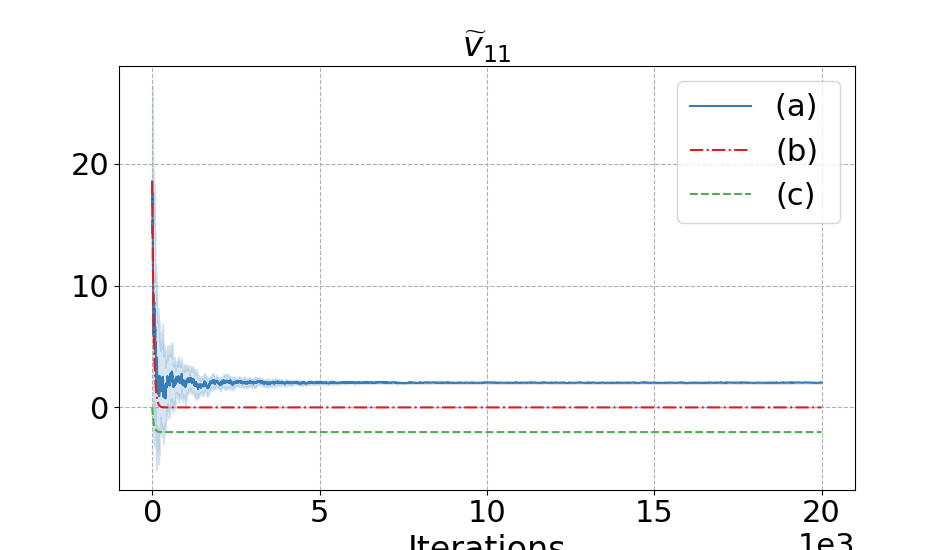

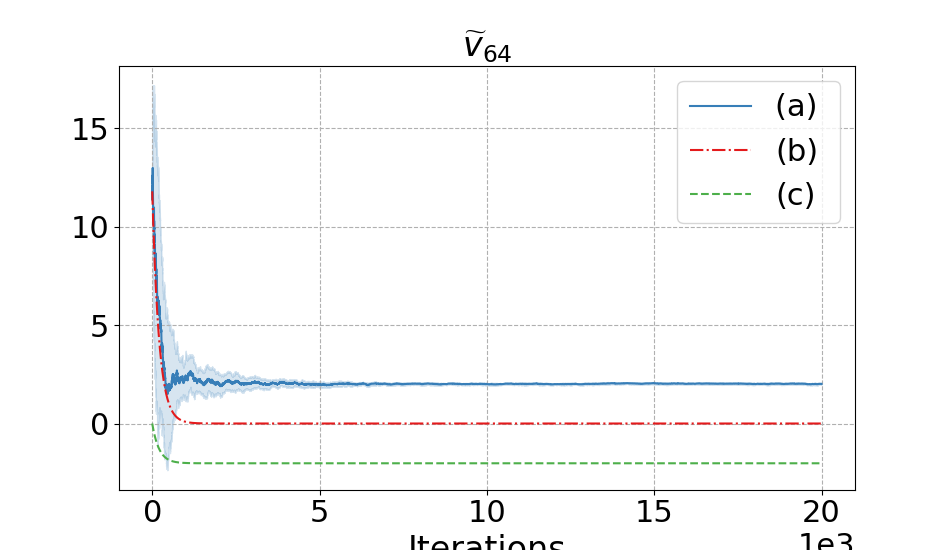

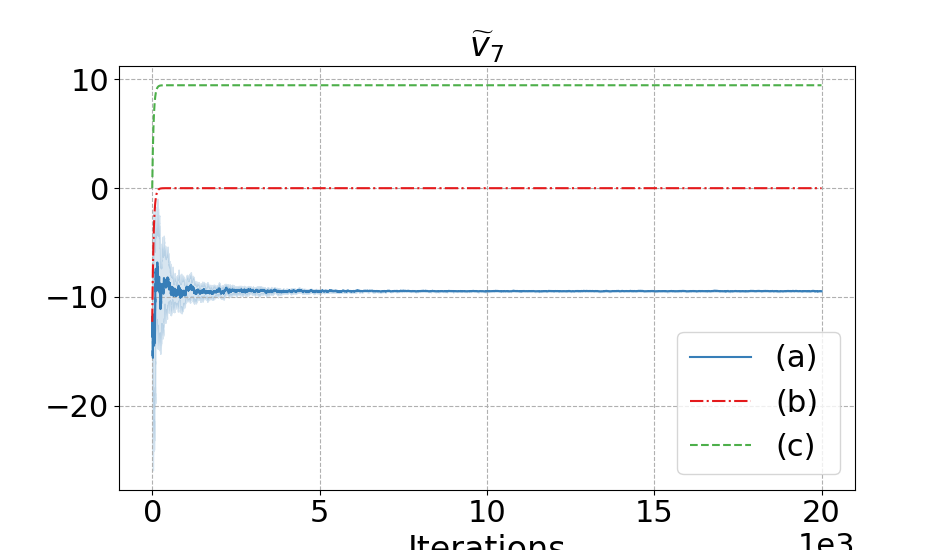

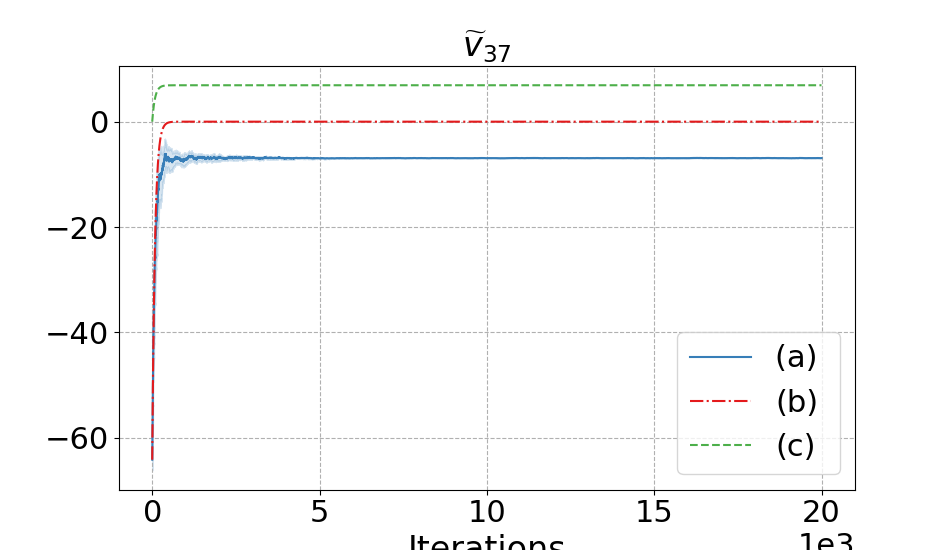

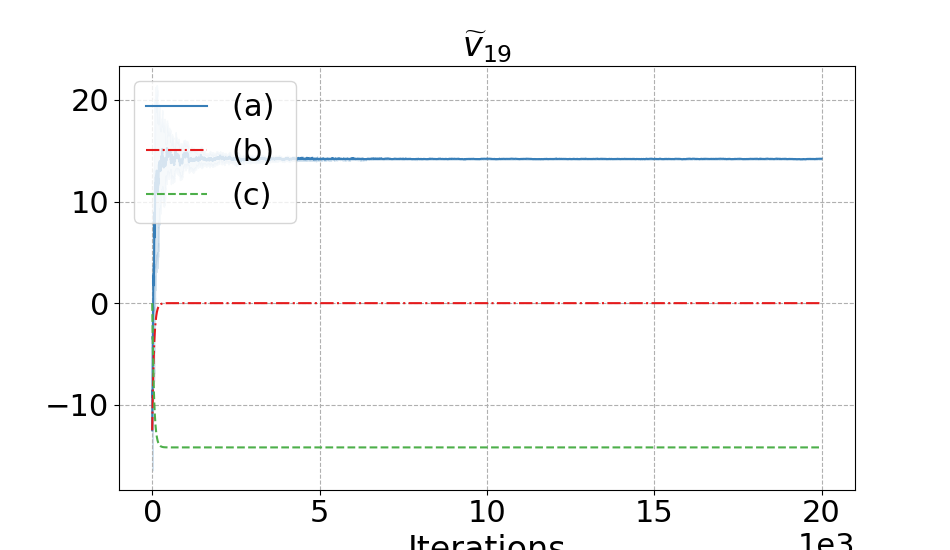

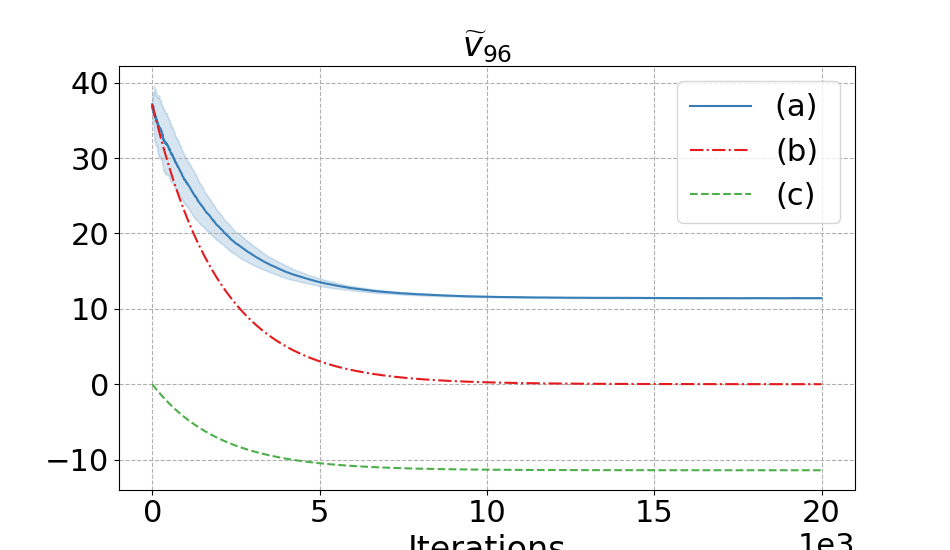

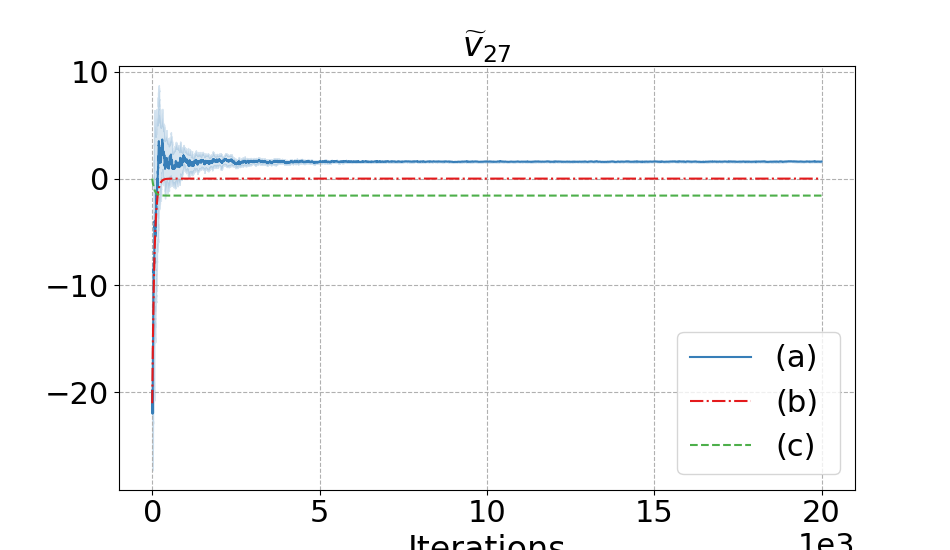

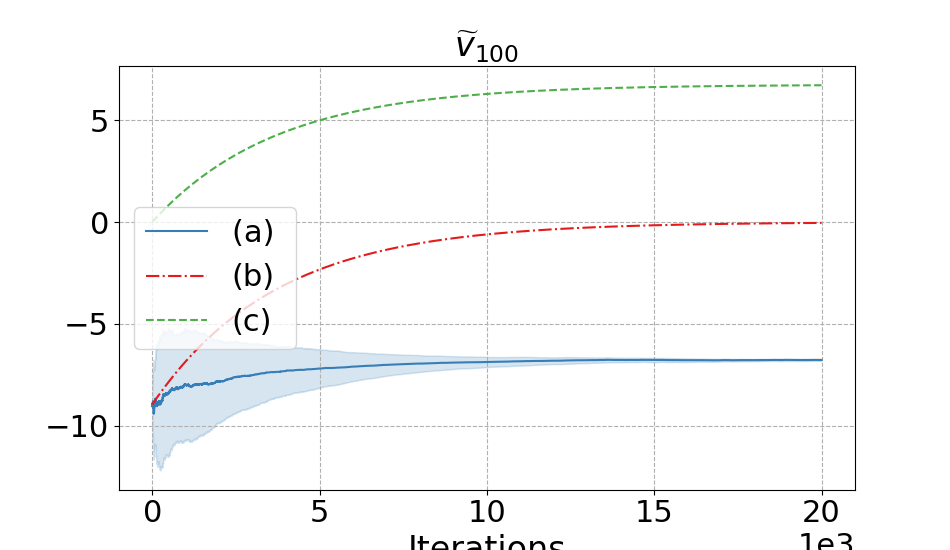

In [96]:
count = 0
for v in indices:
    # plotting
    plt.figure(figsize=(9.5, 5.5))

    mean =  np.mean(np.array(scalar_product[count]), axis = 0)
    std = np.std(np.array(scalar_product[count]), axis = 0)

    plt.plot(mean, label="(a) ", color='#377eb8')
    plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.2, color='#377eb8')
    plt.plot(b[count], label='(b)', color='#e41a1c', linestyle='dashdot')
    plt.plot(c[count], label='(c)', color='#4daf4a', linestyle='dashed')
    

    plt.xlabel("Iterations",fontsize = 24)
    plt.rcParams['xtick.labelsize']=22
    plt.rcParams['ytick.labelsize']=22
    plt.legend(fontsize=22)
    plt.title(r'$\widetilde{v}_{%d}$'%(v+1), fontsize = 24)
    plt.grid(linestyle = '--')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
    
    count += 1